<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-Aug-2023/blob/main/Ola_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Business Case: OLA - Ensemble Learning

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

We need to focused on driver team attrition with given monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)
Dataset:

Dataset Link: ola_driver.csv

Column Profiling:

MMMM-YY : Reporting Date (Monthly)
Driver_ID : Unique id for drivers
Age : Age of the driver
Gender : Gender of the driver – Male : 0, Female: 1
City : City Code of the driver
Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
Income : Monthly average Income of the driver
Date Of Joining : Joining date for the driver
LastWorkingDate : Last date of working for the driver
Joining Designation : Designation of the driver at the time of joining
Grade : Grade of the driver at the time of reporting
Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)
Concepts Tested:

Ensemble Learning- Bagging
Ensemble Learning- Boosting
KNN Imputation of Missing Values
Working with an imbalanced dataset
What "good" looks like:

Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.

Convert date-like features to their respective data type

Check for missing values and Prepare data for KNN Imputation

You may consider only numerical features for this purpose

Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)

Feature Engineering Steps:

Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

Statistical summary of the derived dataset

Check correlation among independent variables and how they interact with each other

One hot encoding of the categorical variable

Class Imbalance Treatment

Standardization of training data

Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning

Results Evaluation:

Classification Report

ROC AUC curve

Provide actionable Insights & Recommendations

Evaluation Criteria (100 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables)
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Preprocessing (50 Points)
KNN Imputation
Feature Engineering
Class Imbalance treatment
Standardization
Encoding
Model building (20 Points)
1 Ensemble - Bagging Algorithm
1 Ensemble - Boosting Algorithm
Results Evaluation (10 Points)
ROC AUC Curve & comments
Classification Report (Confusion Matrix etc)
Actionable Insights & Recommendations (10 Points)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as san
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import  ConfusionMatrixDisplay, accuracy_score, confusion_matrix,classification_report, roc_curve,  roc_auc_score
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import  StandardScaler
from datetime import datetime
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [ ]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


MMMM-YY : Reporting Date (Monthly) eg. 12/01/19

Driver_ID : Unique id for drivers eg. 4

Age : Age of the driver eg. 43.0

Gender : Gender of the driver – Male : 0, Female: 1 eg. 0

City : City Code of the driver eg. C13

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate eg. 2

Income : Monthly average Income of the driver eg. 65600

Date Of Joining : Joining date for the driver eg. 12/07/19

LastWorkingDate : Last date of working for the driver eg. NaN, 27/04/20

Joining Designation : Designation of the driver at the time of joining eg. 2

Grade : Grade of the driver at the time of reporting eg. 2

Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments) eg. 350000, 0

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better) eg. 2,1

In [ ]:
df.shape

(19104, 14)

Insight:
There are 19104 rows and 14 columns, but single driver id has multiple rows so need to group them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
MMM-YY,19104,24,01/01/19,1022
City,19104,29,C20,1008
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


Insight:
There are no need of Unnnamed column as Driver_ID uniquely identify the records

In [ ]:
df.drop(columns='Unnamed: 0', axis =1, inplace=True)

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Insight:

There are 61, 52 null values for Age and Gender and a high range(17488) null values for  (LastWorkingDate) becuase driver didnt left the company only (19104-17488)= 1616 rows indicates their driver left the company.

**Feature Engineering Steps:**


Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1


Creating the target varaible, since it is absent in dataset.


In [ ]:
#create a deep copy of the dataset
df1=df.copy(deep=True)

#select the last value of unique driver id to know the latest status of the driver
first=(df1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()

#if driver churhed the value should 1 else 0
first['LastWorkingDate'].replace({True:1,False:0}, inplace=True)
first.rename(columns={'LastWorkingDate':'Target'}, inplace=True)


In [ ]:
first.head(10)

,Driver_ID,Target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1
5,8,0
6,11,1
7,12,0
8,13,0
9,14,1


Insight:
Target variable created with value 1 for churn and 0 for non churn employee.


**Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1**

In [ ]:
#first value of quarterly rating as quarter1 rating
Quarter1=(df1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
#last value of quarterly rating as quarter2 rating
Quarter2=(df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()
#to calculate promotion in rating or not first merge the value and then look for promotion
first=first.merge(Quarter1, on ='Driver_ID')
first=first.merge(Quarter2, on ='Driver_ID')
first.head()


,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


Insight:
Assign value 1 to promotion if Quarterly rating increases else 0

In [ ]:
first['promotion']=np.where(first['Quarterly Rating_x']==first['Quarterly Rating_y'],0,1)
first.head()

,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y,promotion
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1


**Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1**

In [ ]:
#first value of Income as Income1 rating
Income1=(df1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
#last value of Income as Income2 rating
Income2=(df1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()
#to calculate raise in Income or not first merge the value and then look for raise in Income
first=first.merge(Income1, on ='Driver_ID')
first=first.merge(Income2, on ='Driver_ID')
#to calculate the raise in value
first['raise']=np.where(first['Income_x']==first['Income_y'],0,1)
first.head()

,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y,promotion,Income_x,Income_y,raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


Insight:
If the monthly income raised then 1 else 0 is assigned for the values of column raise.


In [ ]:
first=first[['Driver_ID', 'Target','promotion', 'raise' ]]
first.head()

,Driver_ID,Target,promotion,raise
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,1,0


In [ ]:
df1=df1.groupby('Driver_ID').agg({'MMM-YY':'count', 'Driver_ID':'first', 'Age':'max',	'Gender':'last', 'City':'last','Education_Level':'last', 'Income':'sum',	'Dateofjoining':'first',	'LastWorkingDate':'last',	'Joining Designation':'last',	'Grade':'last', 	'Total Business Value':'sum',	'Quarterly Rating':'first'})

In [ ]:
df1.shape

(2381, 13)

**Splitting of feature datetime into month and year**

In [ ]:
df1['month']=pd.to_datetime(df1['Dateofjoining']).dt.month
df1['year']=pd.DatetimeIndex(df1['Dateofjoining']).year
df1.rename(columns={'MMM-YY' :'Reportings'}, inplace=True)
df1['Gender']=df1['Gender'].astype('int64')
df1.reset_index(drop=True, inplace=True)
df1=df1.merge(first, on='Driver_ID')



In [ ]:
df1.head(5)

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,raise_y,Target_x,promotion_x,raise_x,Target_y,promotion_y,raise_y,Target,promotion,raise
0,3,1,28,0,23,2,172161,24/12/18,03/11/19,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2,31,0,7,2,134032,11/06/20,None,2,...,0,1,0,0,1,0,0,1,0,0
2,5,4,43,0,13,2,328015,12/07/19,27/04/20,2,...,0,0,0,0,0,0,0,0,0,0
3,3,5,29,0,9,0,139104,01/09/19,03/07/19,1,...,0,0,0,0,0,0,0,0,0,0
4,5,6,31,1,11,1,393640,31/07/20,None,3,...,0,1,1,0,1,1,0,1,1,0


Insight:
1. Age are in float need to convert in int and
2. city is in string (C23, C7, C13), need to convert it into int.

In [ ]:
df1['Age']=df1['Age'].astype('int64')
#convert city as string and extract all numeric values , unstack the series into dataframe and fill the nan value with''
df1['City']=df1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')

In [ ]:
df1


,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,month,year,Target,promotion,raise
0,3,1,28,0,23,2,172161,24/12/18,03/11/19,1,1,1715580,2,12,2018,0,0,0
1,2,2,31,0,7,2,134032,11/06/20,None,2,2,0,1,11,2020,1,0,0
2,5,4,43,0,13,2,328015,12/07/19,27/04/20,2,2,350000,1,12,2019,0,0,0
3,3,5,29,0,9,0,139104,01/09/19,03/07/19,1,1,120360,1,1,2019,0,0,0
4,5,6,31,1,11,1,393640,31/07/20,None,3,3,1265000,1,7,2020,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34,0,24,0,1987560,15/10/15,None,2,3,21748820,3,10,2015,1,1,0
2377,3,2785,34,1,9,0,36315,28/08/20,28/10/20,1,1,0,1,8,2020,0,0,0
2378,9,2786,45,0,19,0,318330,31/07/18,22/09/19,2,2,2815090,2,7,2018,0,1,0
2379,6,2787,28,1,20,2,416988,21/07/18,20/06/19,1,1,977830,2,7,2018,0,1,0


Insight:
Target variable is already created from LastWorkingDate and year and month features are derived from Dateofjoining, so there is no need of these two features .

In [ ]:
df1.drop(['Dateofjoining',	'LastWorkingDate'], axis=1, inplace=True)


In [ ]:
df1.isna().sum()

Reportings              0
Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
month                   0
year                    0
Target                  0
promotion               0
raise                   0
dtype: int64

Insight:
Missing values treated , no null .

**Statistical summary of the derived dataset**

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
City,2381.0,1.533557e+01,8.371843e+00,1.0,8.0,15.0,22.0,29.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0


In [ ]:
df1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,month,year,Target,promotion,raise
0,3,1,28,0,23,2,172161,1,1,1715580,2,12,2018,0,0,0
1,2,2,31,0,7,2,134032,2,2,0,1,11,2020,1,0,0
2,5,4,43,0,13,2,328015,2,2,350000,1,12,2019,0,0,0
3,3,5,29,0,9,0,139104,1,1,120360,1,1,2019,0,0,0
4,5,6,31,1,11,1,393640,3,3,1265000,1,7,2020,1,1,0


**Visualization**

**Univariate**

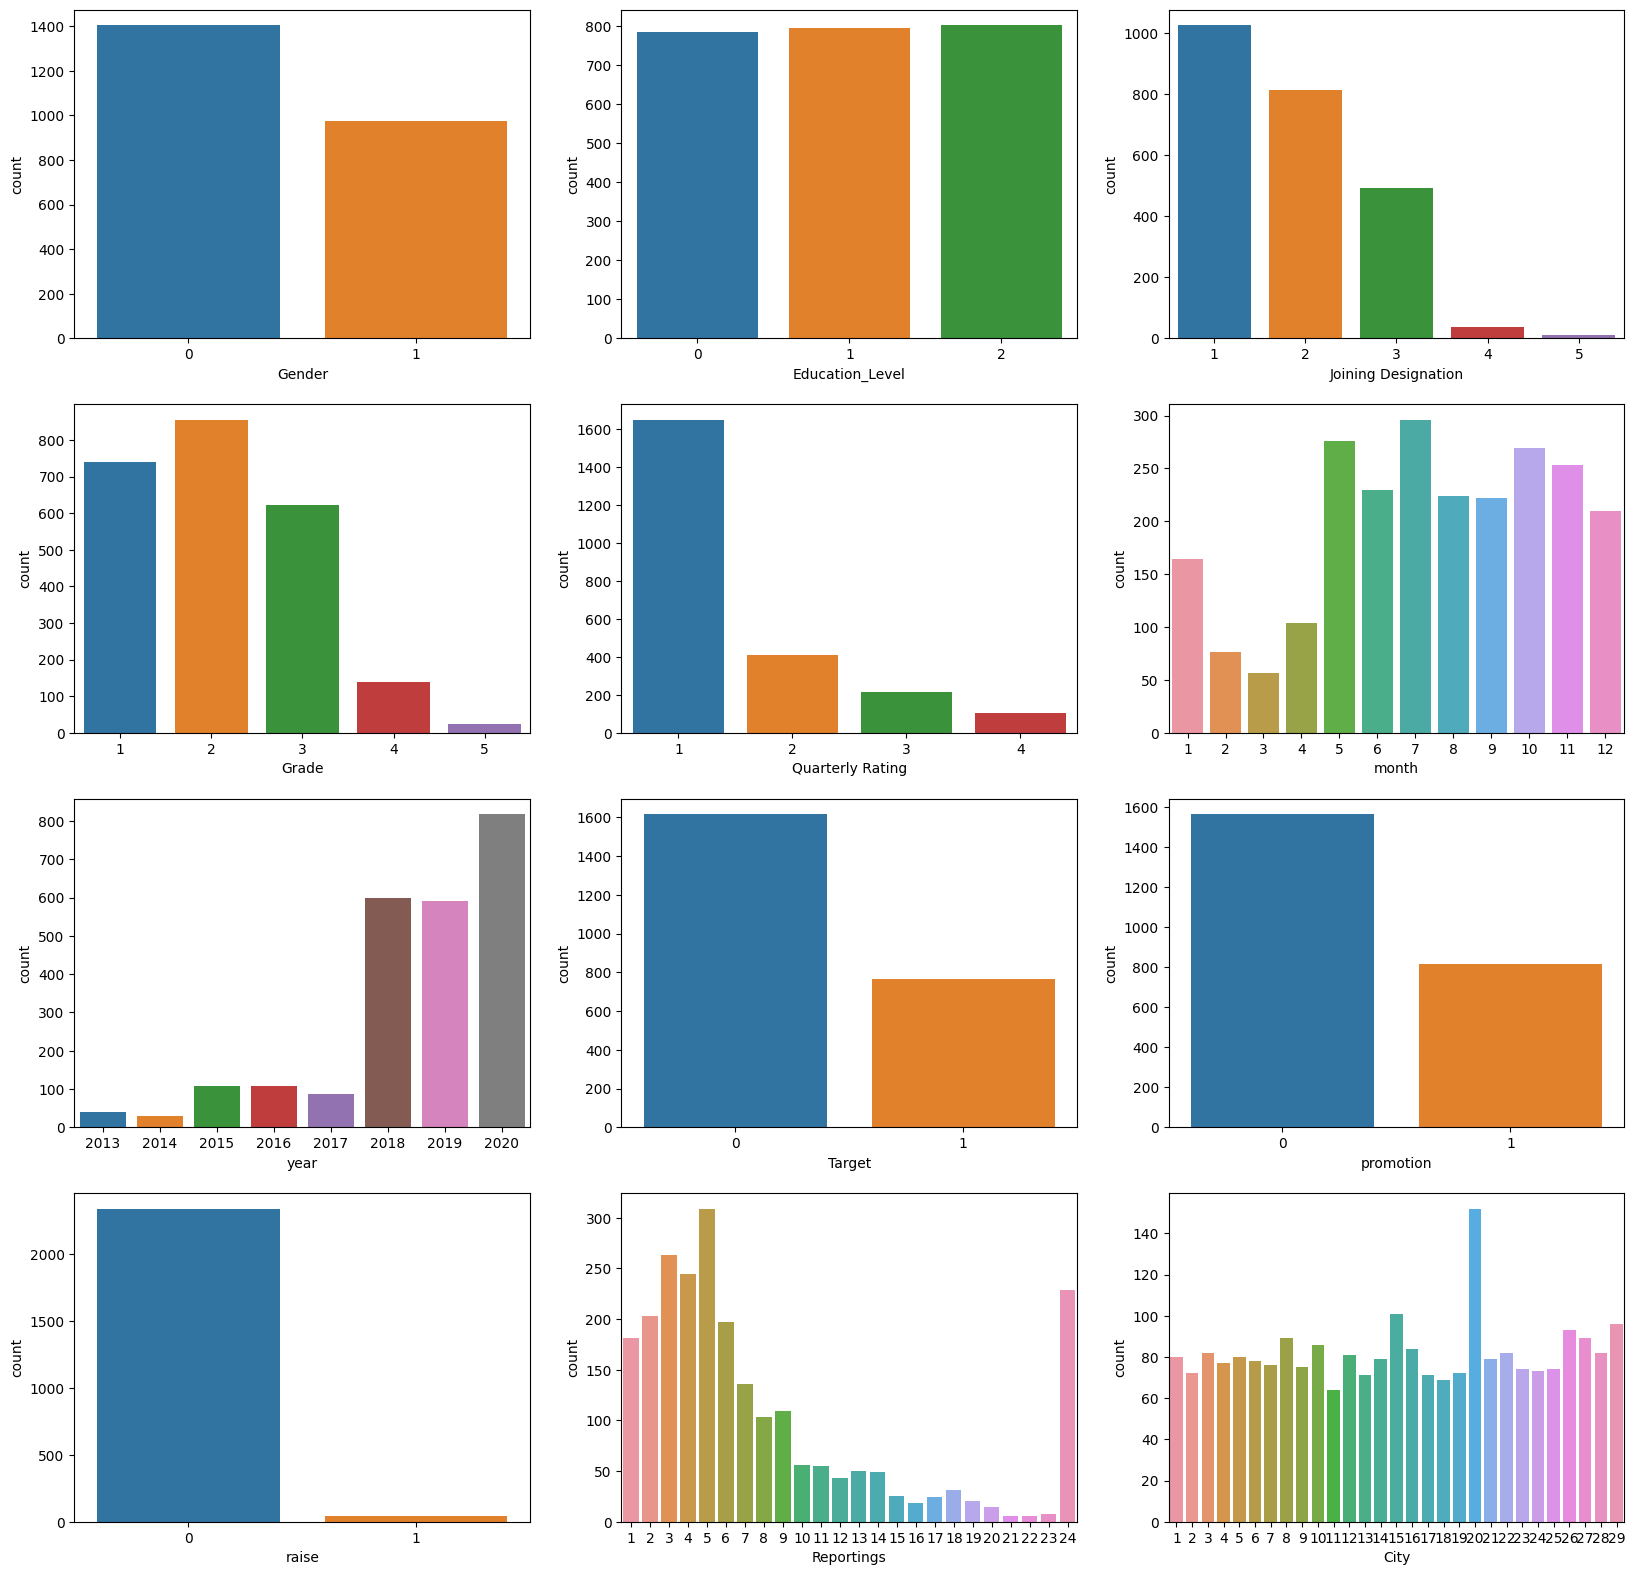

In [ ]:
cols=['Gender',	'Education_Level',	'Joining Designation',	'Grade',	'Quarterly Rating',	'month',	'year',	'Target',	'promotion',	'raise','Reportings', 'City' ]
#'Driver_ID',	'Income',	'Total Business Value',
f,a=plt.subplots(nrows=4, ncols=3, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(4):
  for col in range(3):
    san.countplot(data=df1, x=cols[i],ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
1. There are more male drivers(almost 1400) and less female drivers(almost 900).
2. Education level doesnt effect very much.
3. Joining designation has 1 for the most of the drivers and gradually decrease and 5 is the least.
4. The most drivers are of grade 2 and least is 5.
5. Quartely rating is 1 for the most of the drivers.
6. In July most ride is done and in march the least ride is noted.
7. In 2020 most ride was done.
8. Target variable is imbalanced with non churned has more datapoints than churned.
9. Raise and promotion increses if driver not churned and decreses when driver churned.
10. maximum reportings is 5 then 3, 4 and 24 respectively.
11. City 20 has the max number of rides.

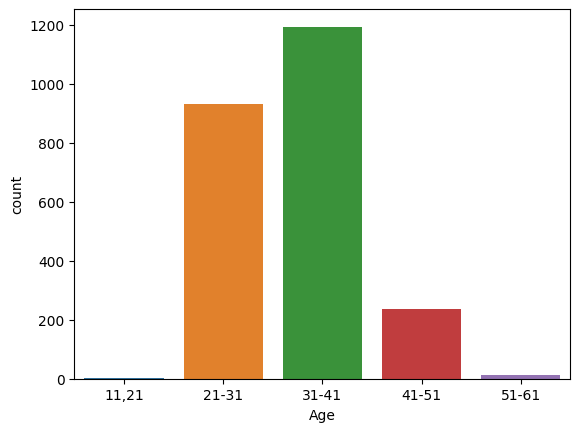

In [ ]:
#data visualization  according to age
a = pd.cut(df1.Age, bins=[11,21,31,41,51,61], labels=['11,21','21-31','31-41','41-51','51-61'])
san.countplot(x=a)
plt.show()

Insight:
The driver of age group 31-41 is more in OLA.

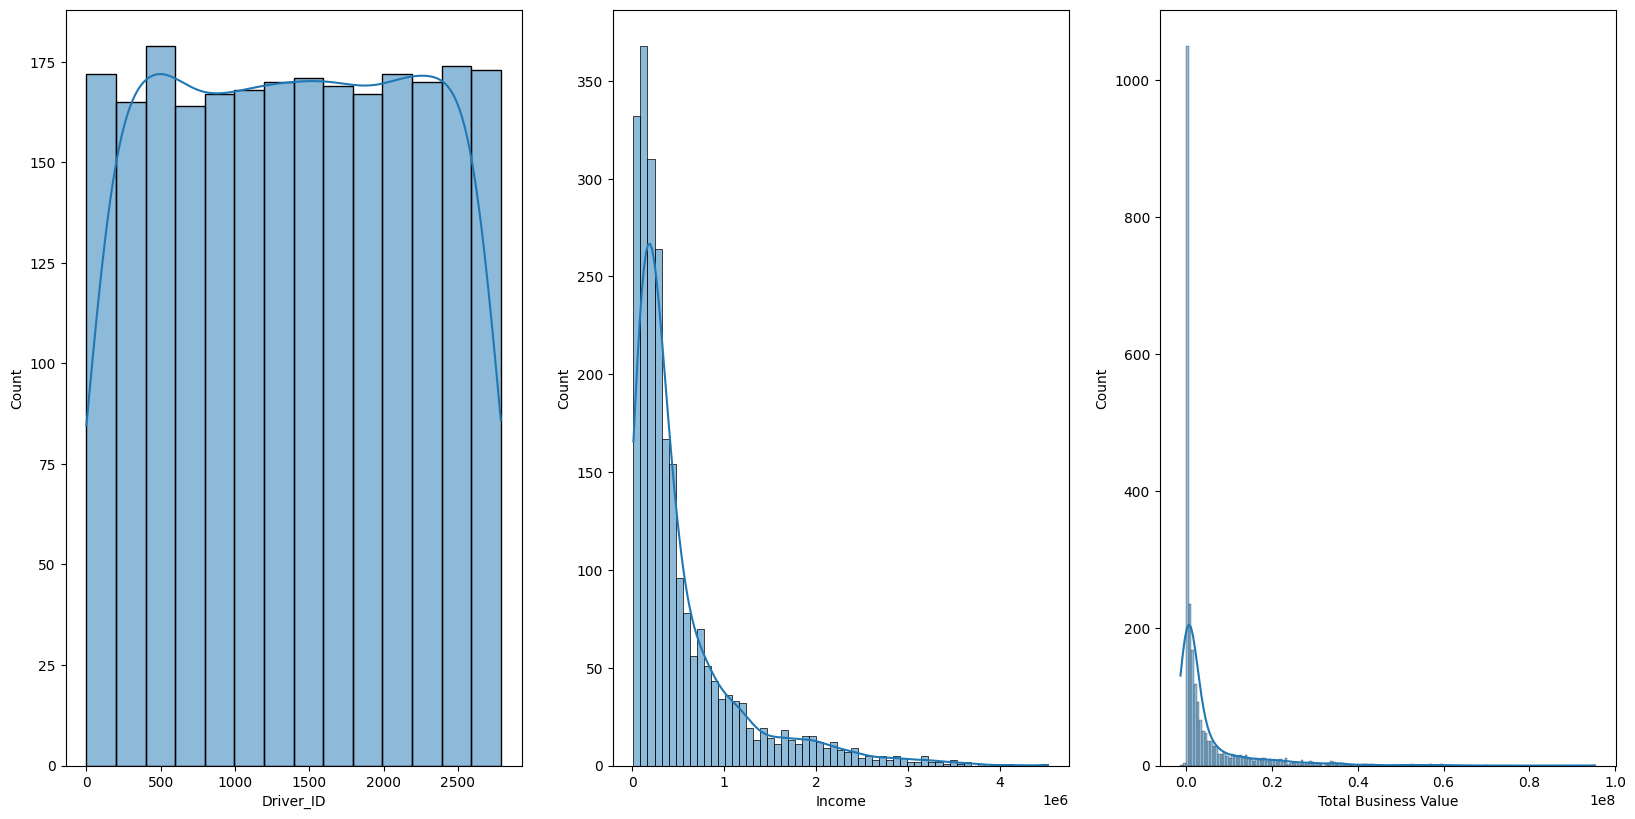

In [ ]:
cols=['Driver_ID',	'Income',	'Total Business Value']
f,a=plt.subplots(ncols=3, figsize=(20,4))
i=0
f.subplots_adjust(top=2)
for row in range(1):
  for col in range(3):
    san.histplot(data=df1, x=cols[i],kde=True, ax=a[col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
Income and Total business value are right skwed shows outliers

**Bivariate:**

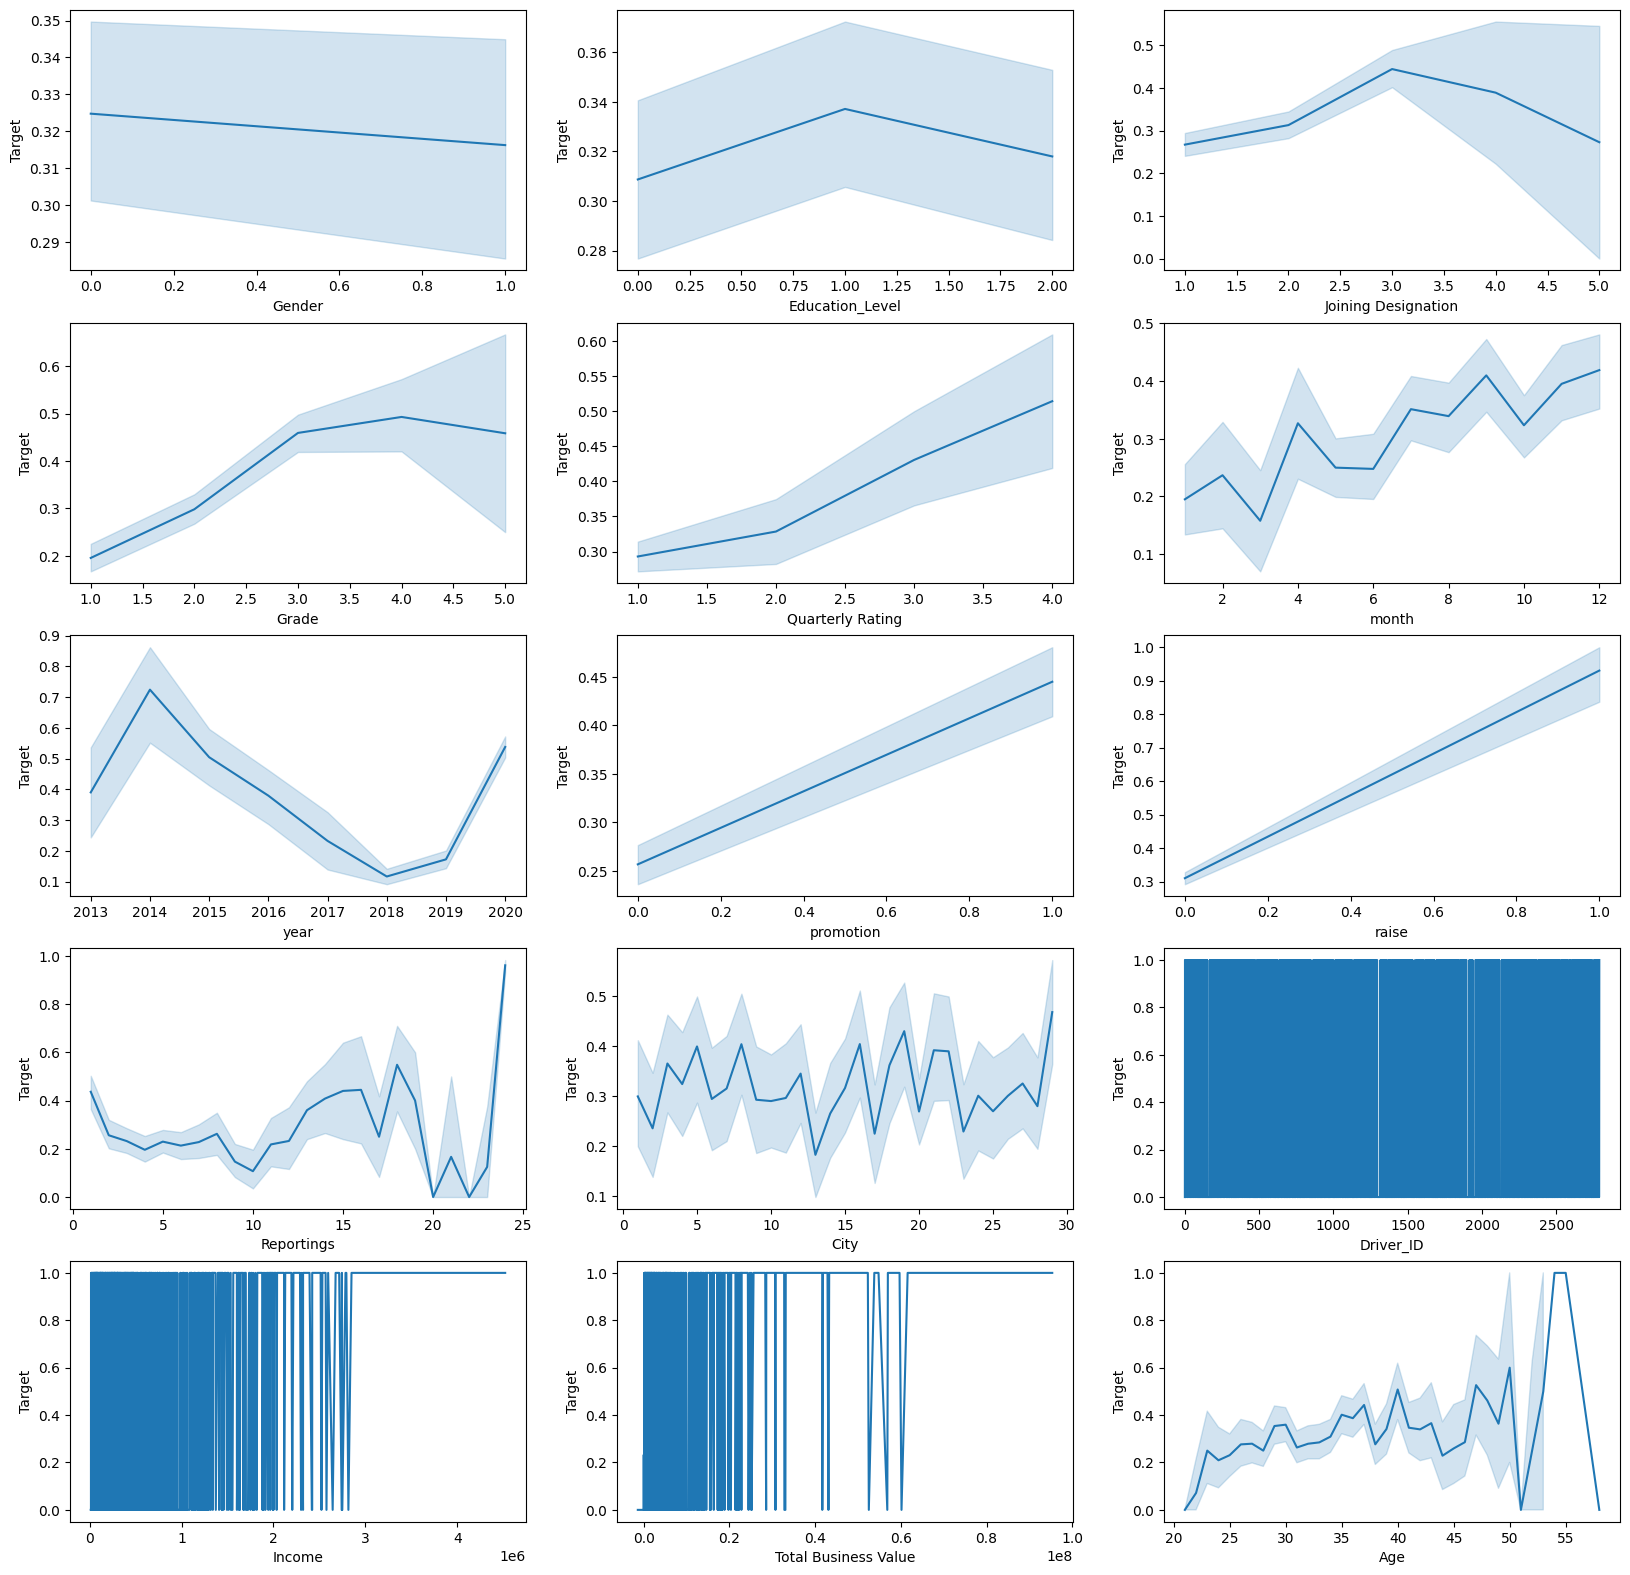

In [ ]:
cols=['Gender',	'Education_Level',	'Joining Designation',	'Grade',	'Quarterly Rating',	'month',	'year',	'promotion',	'raise','Reportings', 'City' , 'Driver_ID',	'Income',	'Total Business Value', 'Age']


f,a=plt.subplots(nrows=5, ncols=3, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(5):
  for col in range(3):
    san.lineplot(data=df1, x=cols[i],y='Target', ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
1. Both gender almost equally churn.
2.  Education level 1 churn the most.
3. Joining designation 3 churn the most.
4. Driver with grade 3-5 churn more.
5. Driver with Quarterly rating 4 churn more.
6. Drivers churn more on September, November, December.
7. In year 2014 drivers churn more and then downwards trend shows but since 2019 churning trend upward.
8.  Drivers who got mnore promotion and raise churn more.
9. Drivres with reportings 24 almost all churn .
10. 55 years old churn the most.

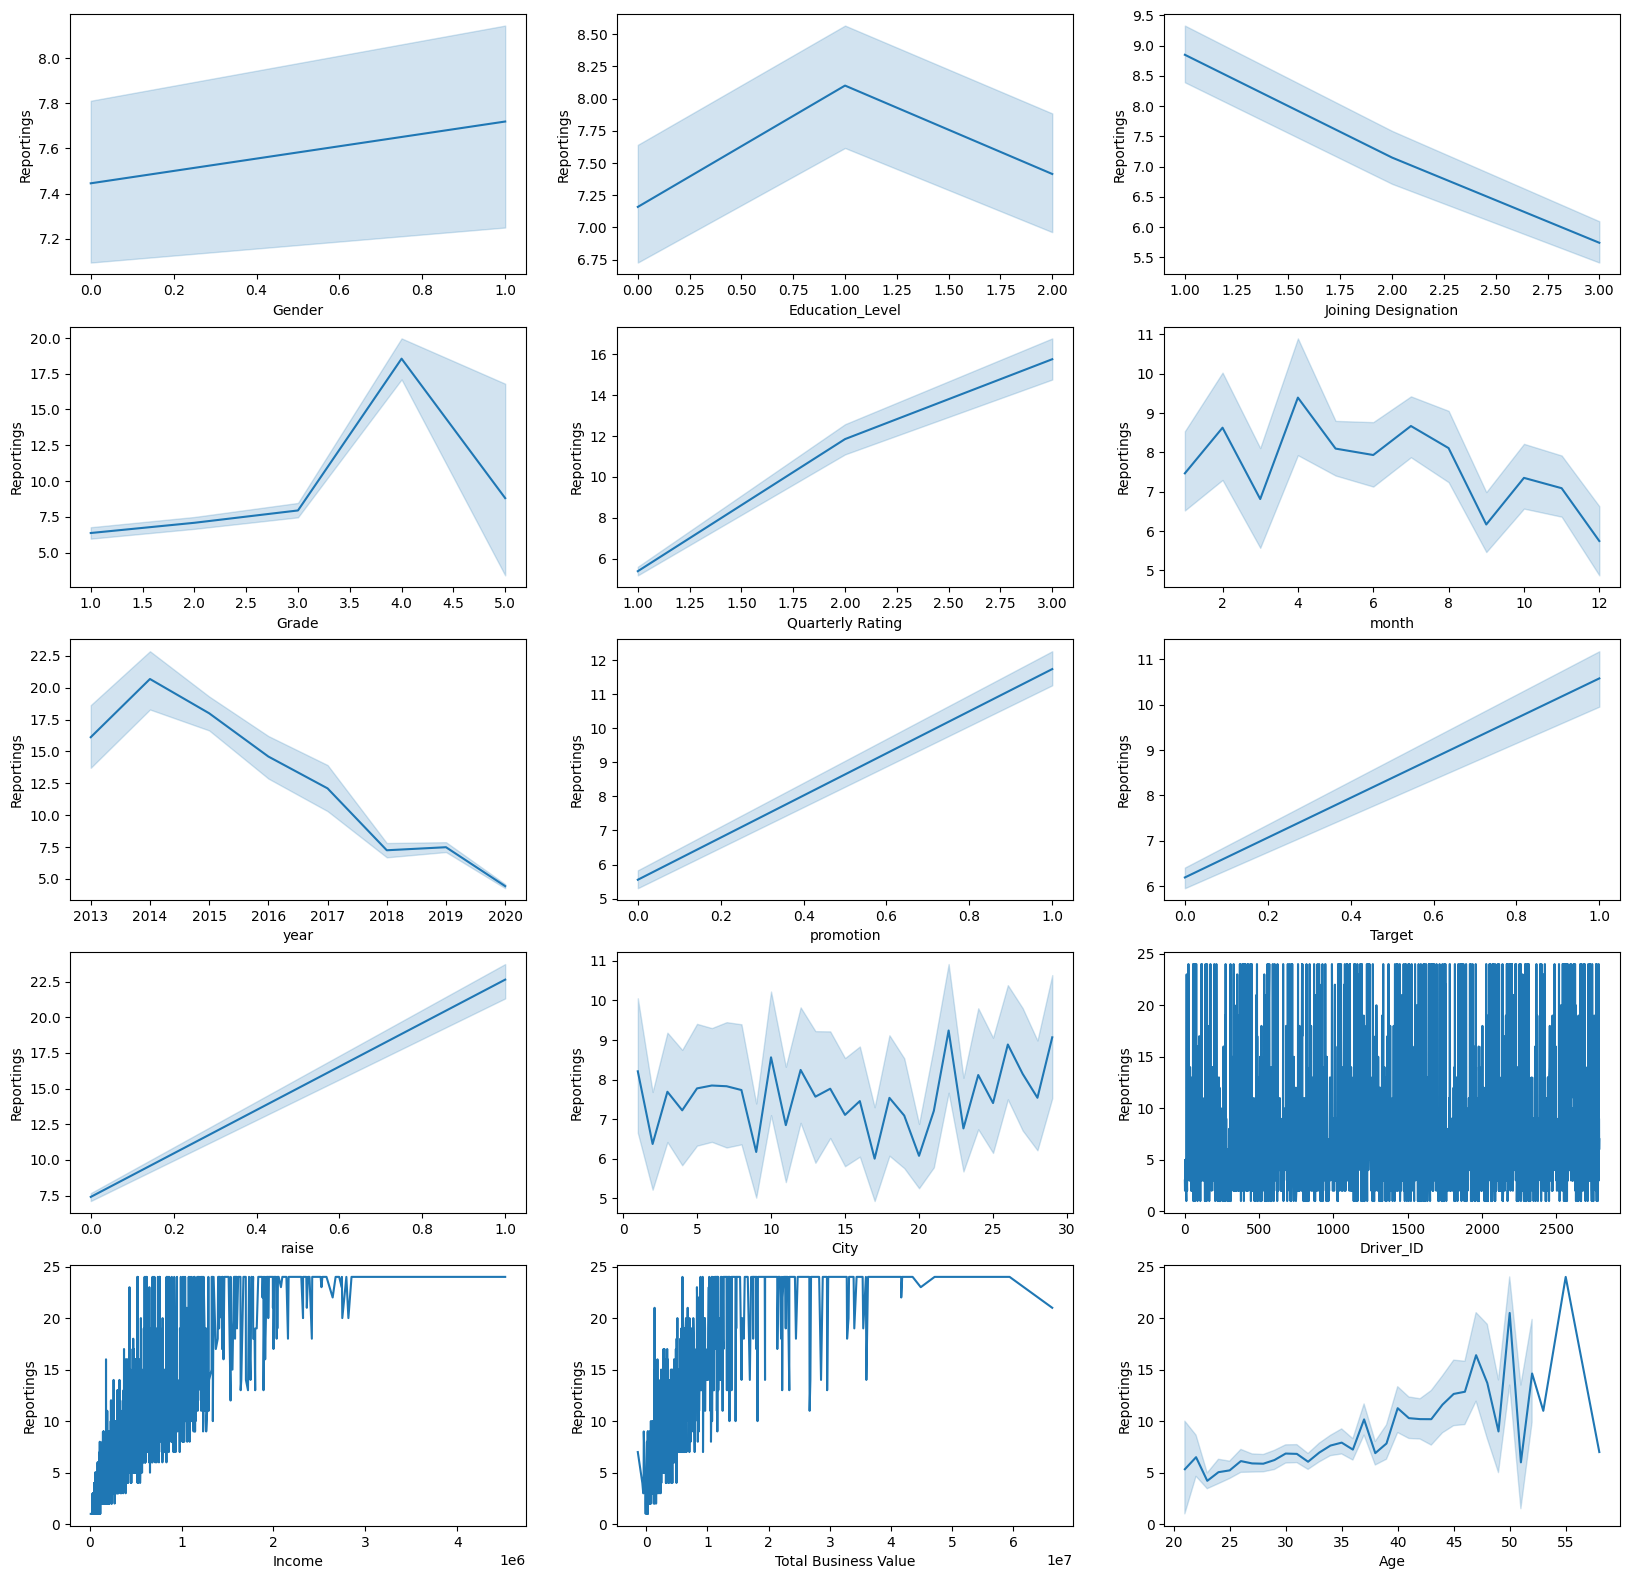

In [ ]:
cols=['Gender',	'Education_Level',	'Joining Designation',	'Grade',	'Quarterly Rating',	'month',	'year',	'promotion','Target',	'raise', 'City' , 'Driver_ID',	'Income',	'Total Business Value', 'Age']


f,a=plt.subplots(nrows=5, ncols=3, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(5):
  for col in range(3):
    san.lineplot(data=df1, x=cols[i],y='Reportings', ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
With the point of view of Reportings varibles
promotion, target, raise, income, total business values are positively related.
year after 2014 and joining designation negatively related




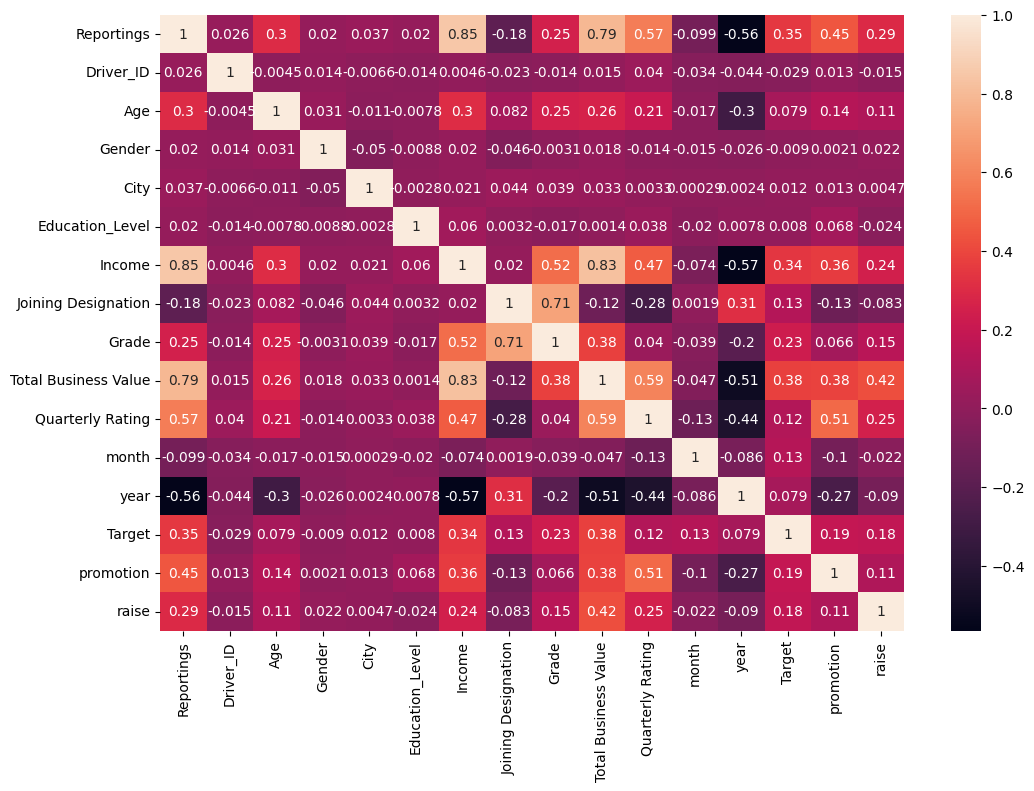

In [ ]:
plt.figure(figsize=(12, 8))
san.heatmap(df1.corr(), annot=True)
plt.show()

Insight:

1. Reportings is strongly positively correlated with Income and Total Business Value and negatively correlated with year.
2. Age is positively related with reportings and Income, grade, total business value and quarterly rating.
3. Income is highly positively related with reportings and total business value and positively related with grade and quarterly rating.
4. joining designation is highly positively correlated with the grade.
5. Grade is positively correlated with joining designation, age, reportings, total business value and income.
6. Total business value positively strongly correlated with reportings, income, qurterly ratings, target, promotion,raise, grade and age.
7. quarterly rating is positevely correlated with reportings, total businesss value, promotion, income and age.
8. Target is positively correlated with age, income, total business value.
9. promotion, raise are positively corelated with reportings, age, income, total business vale quarterly ratig and target.

**Bivaraite analysis and relation beteen independent varaiables**

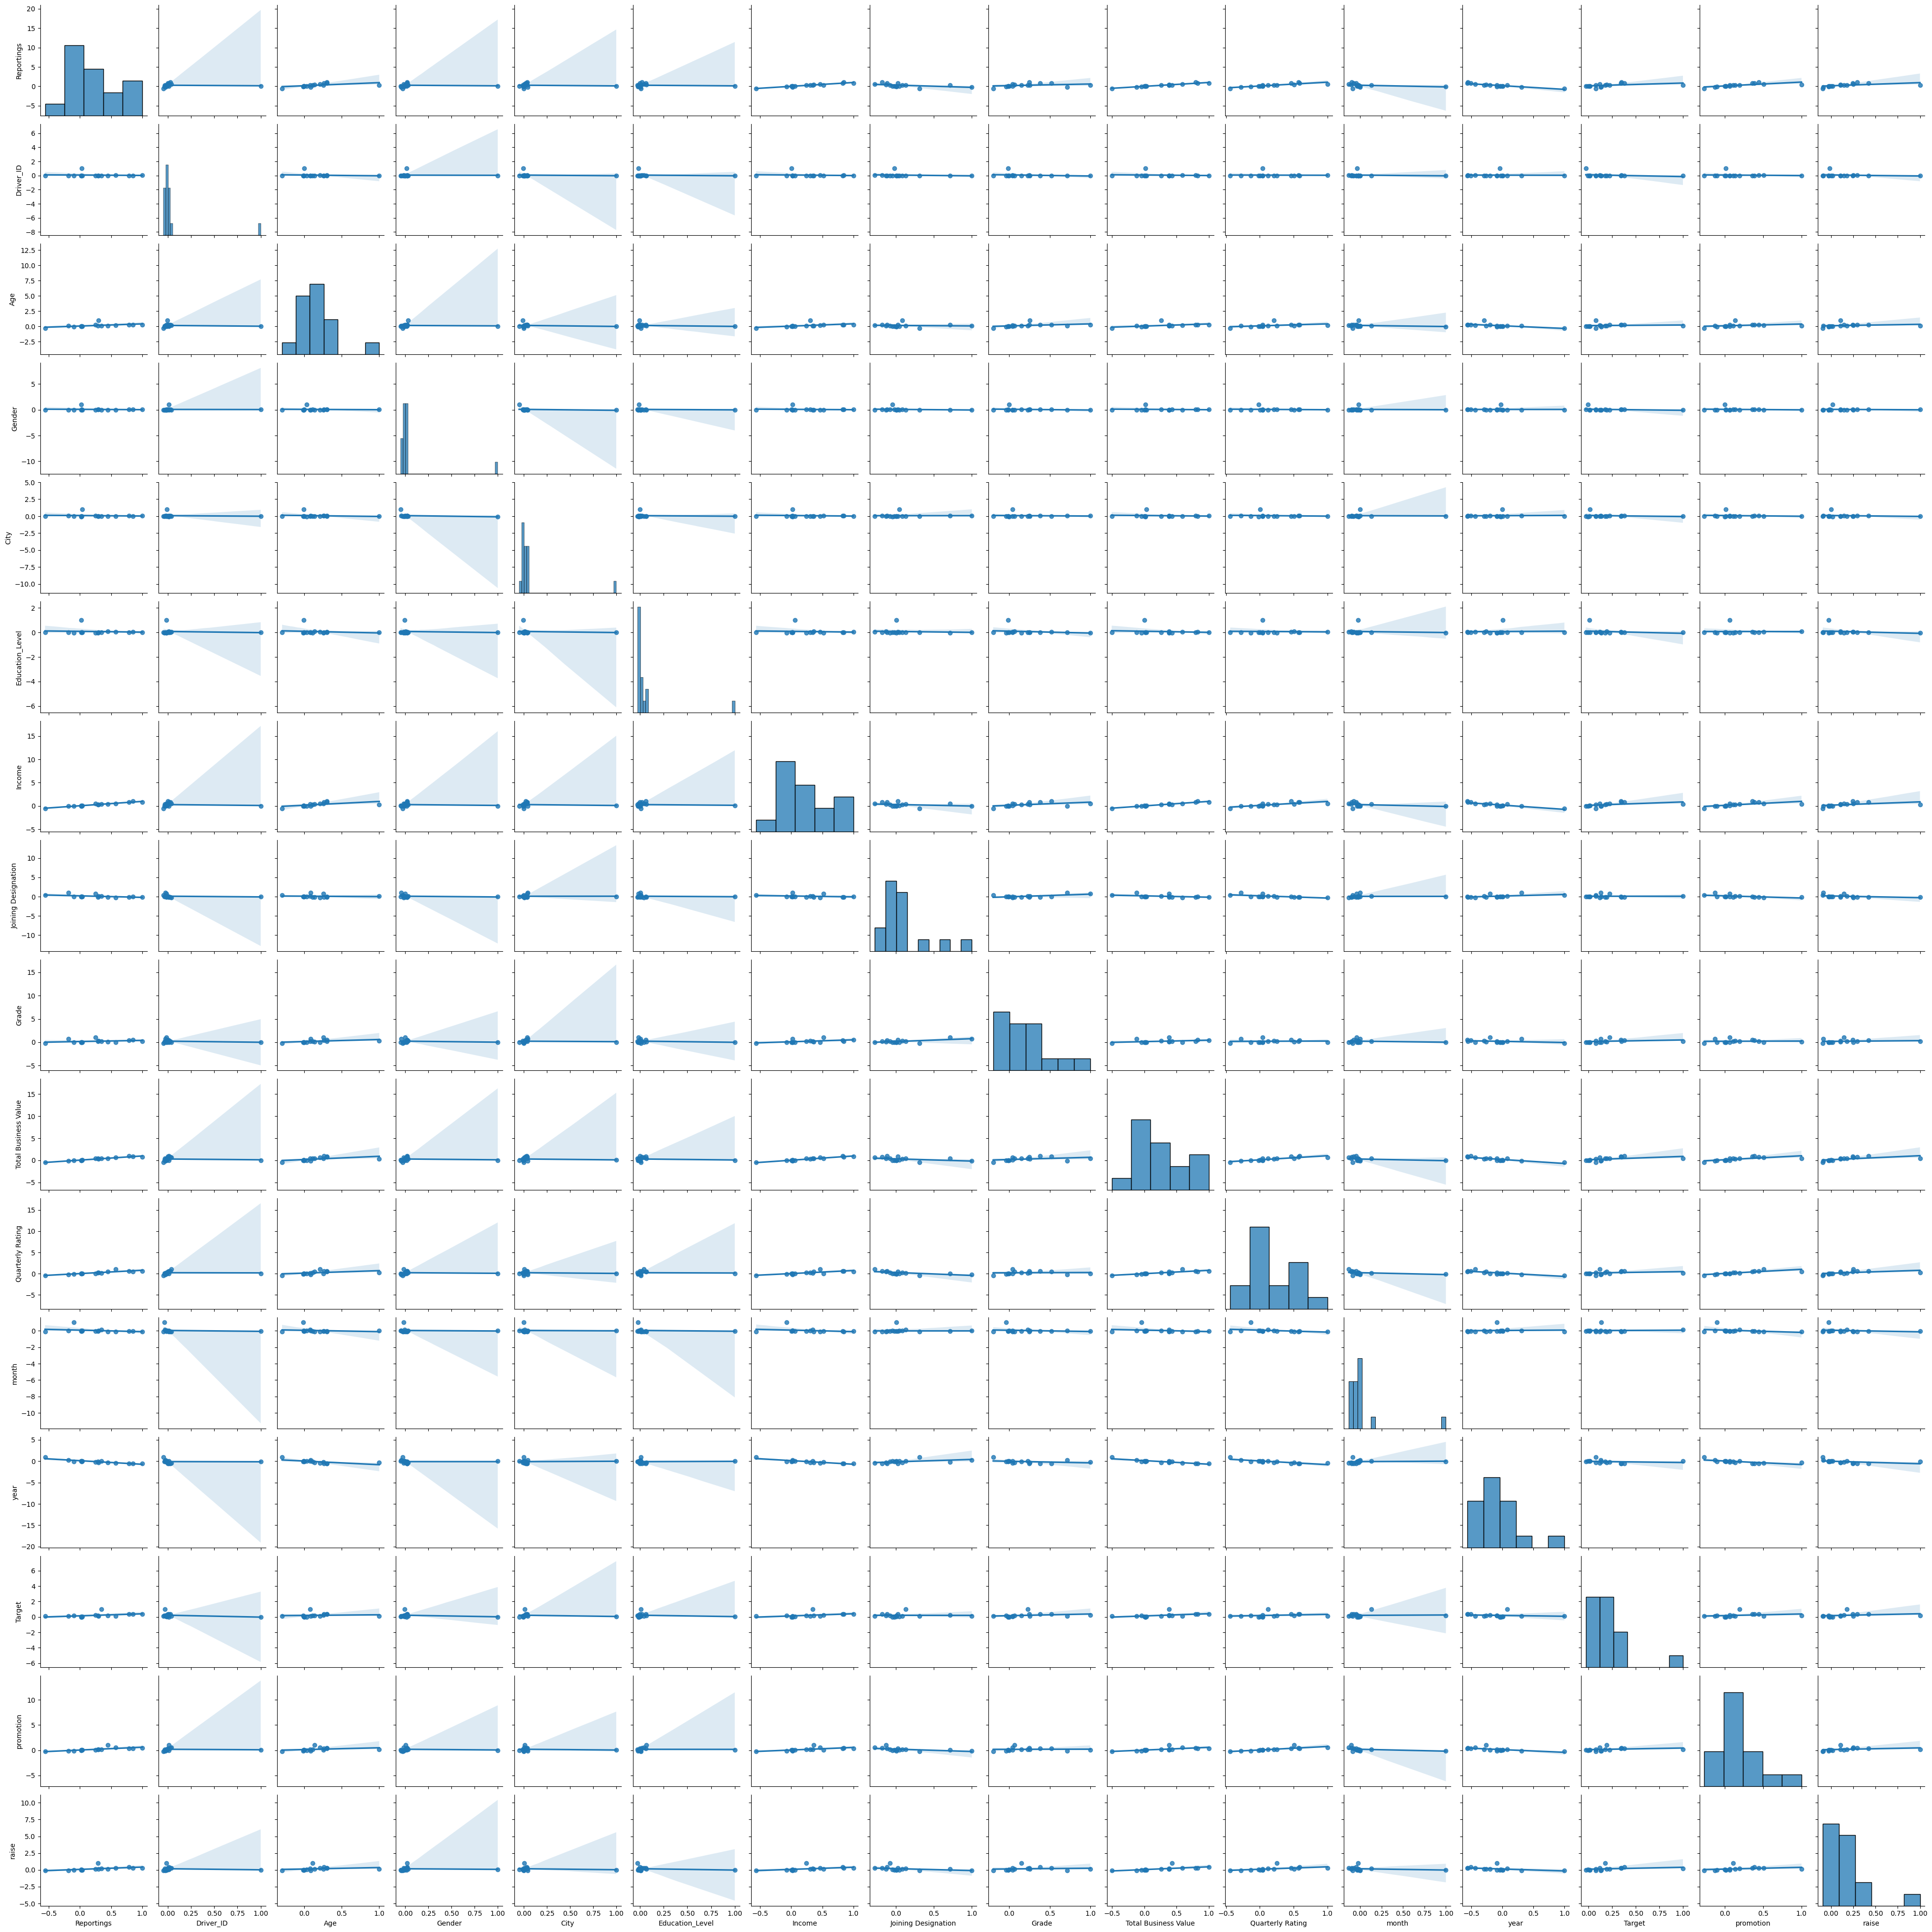

In [ ]:
san.pairplot(df1.corr(),kind= 'reg')

Insight:

Pairplot with regression line shows the same linear correlation as shown in heatmap.

**Outliers Treatment**

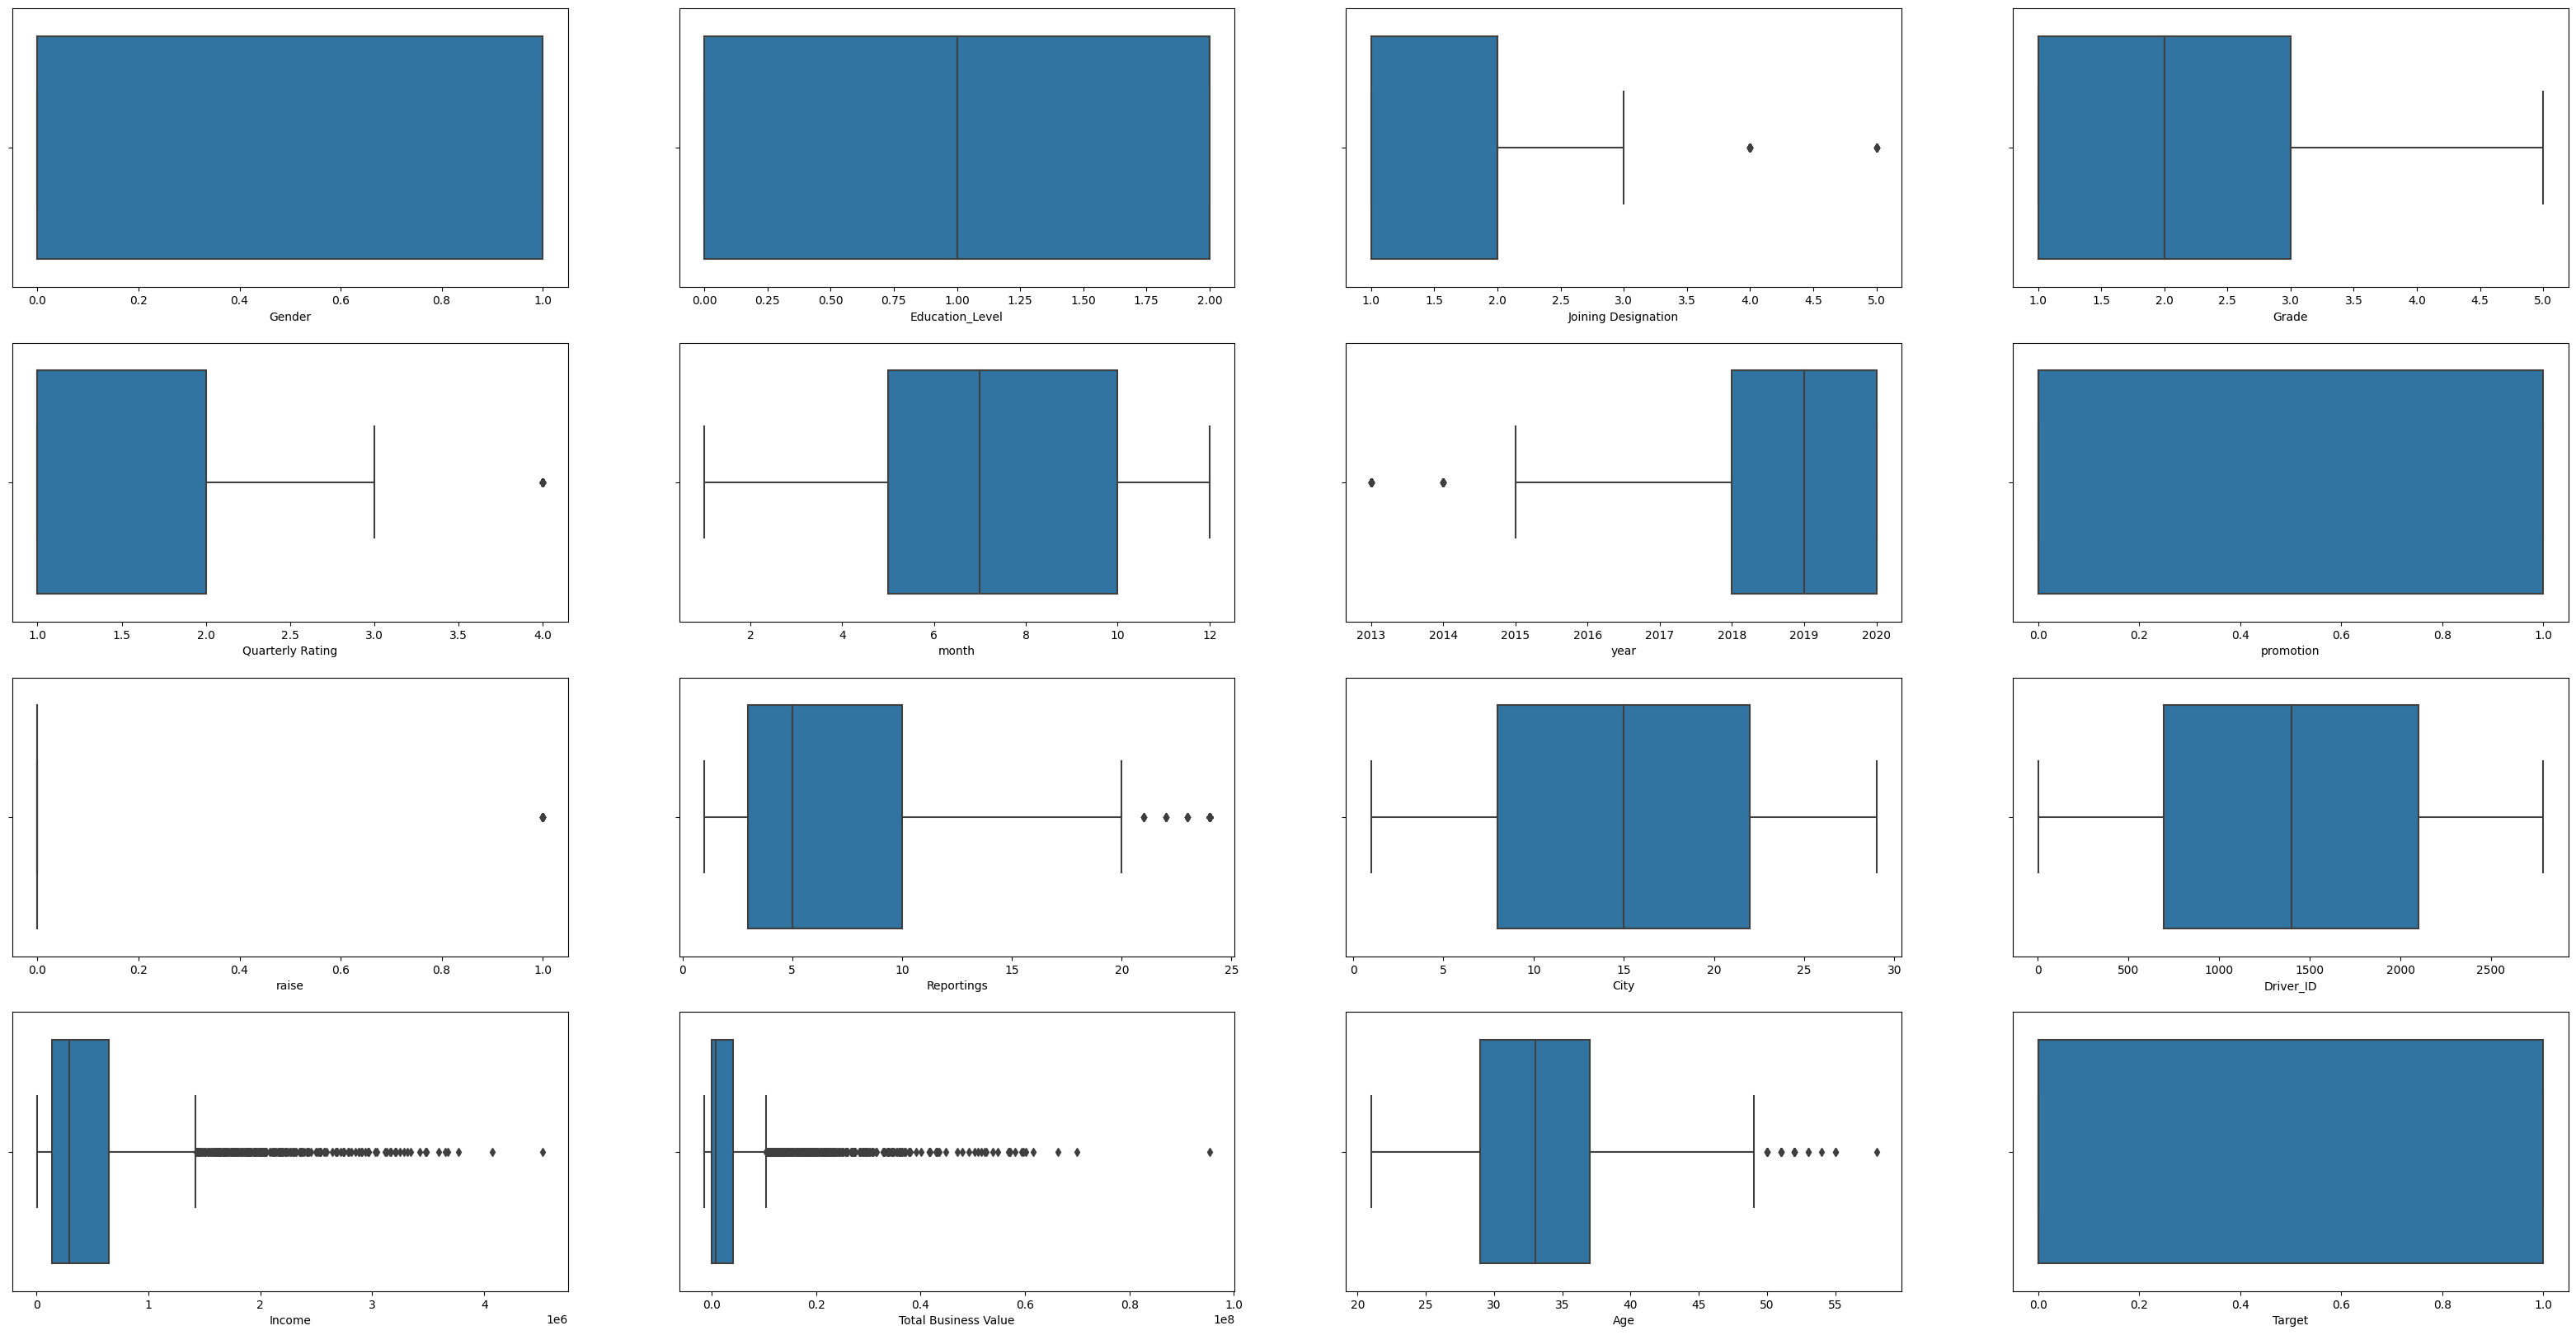

In [ ]:
cols=['Gender',	'Education_Level',	'Joining Designation',	'Grade',	'Quarterly Rating',	'month',	'year',	'promotion',	'raise','Reportings', 'City' , 'Driver_ID',	'Income',	'Total Business Value', 'Age', 'Target']
f,a=plt.subplots(nrows=4, ncols=4, figsize=(40,4))
i=0
f.subplots_adjust(top=4)
for row in range(4):
  for col in range(4):
    san.boxplot(data=df1, x=cols[i],ax=a[row,col])
    i+=1
plt.show()

Insight:

Boxplot shows a large number of outlier in Income, Total Business Value and subsequently less numbers of outliers in age, reportings, and insignificant numbers in year, raise, quarterly ratings and joining designation.

In [ ]:
cols=['Joining Designation', 'Quarterly Rating',	'year',	'raise','Reportings', 'Income',	'Total Business Value', 'Age']
for i in range(len(cols)):
  print("outlier in  " +cols[i] )
  IQR=np.percentile(df1[cols[i]],75)-np.percentile(df1[cols[i]],25)
  print("IQR : ",IQR)
  Q1=np.percentile(df1[cols[i]],25)
  print('Q1 : ',Q1)
  Q3=np.percentile(df1[cols[i]],75)
  print('Q3 : ', Q3)
  upperlimit=Q3+(IQR*1.5)
  print("upperlimit : ",upperlimit)
  lowerlimit=Q1-(IQR*1.5)
  print("lowerlimit : ",lowerlimit)
  outlier=df1[(df1[cols[i]]>upperlimit) |(df1[cols[i]]<lowerlimit)]
  print("outlier in" +cols[i] +": ",len(outlier))
  print("*********************************************")
  i+=1


outlier in  Joining Designation
IQR :  1.0
Q1 :  1.0
Q3 :  2.0
upperlimit :  3.5
lowerlimit :  -0.5
outlier inJoining Designation:  47
*********************************************
outlier in  Quarterly Rating
IQR :  1.0
Q1 :  1.0
Q3 :  2.0
upperlimit :  3.5
lowerlimit :  -0.5
outlier inQuarterly Rating:  105
*********************************************
outlier in  year
IQR :  2.0
Q1 :  2018.0
Q3 :  2020.0
upperlimit :  2023.0
lowerlimit :  2015.0
outlier inyear:  70
*********************************************
outlier in  raise
IQR :  0.0
Q1 :  0.0
Q3 :  0.0
upperlimit :  0.0
lowerlimit :  0.0
outlier inraise:  43
*********************************************
outlier in  Reportings
IQR :  7.0
Q1 :  3.0
Q3 :  10.0
upperlimit :  20.5
lowerlimit :  -7.5
outlier inReportings:  249
*********************************************
outlier in  Income
IQR :  511561.0
Q1 :  139895.0
Q3 :  651456.0
upperlimit :  1418797.5
lowerlimit :  -627446.5
outlier inIncome:  215
***************************

In [ ]:
cols=['Joining Designation', 'Quarterly Rating',	'year',	'raise','Reportings', 'Income',	'Total Business Value', 'Age']

for i in range(2):
  Q1=df1[cols[i]].quantile(0.25)
  Q3=df1[cols[i]].quantile(0.75)
  IQR=Q3-Q1
  df1 = df1[~((df1[cols[i]] < (Q1 - 1.5 * IQR)) | (df1[cols[i]] > (Q3 + 1.5 * IQR)))]
  df1.reset_index(drop=True)

In [ ]:
df1

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,month,year,Target,promotion,raise
0,3,1,28,0,23,2,172161,1,1,1715580,2,12,2018,0,0,0
1,2,2,31,0,7,2,134032,2,2,0,1,11,2020,1,0,0
2,5,4,43,0,13,2,328015,2,2,350000,1,12,2019,0,0,0
3,3,5,29,0,9,0,139104,1,1,120360,1,1,2019,0,0,0
4,5,6,31,1,11,1,393640,3,3,1265000,1,7,2020,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34,0,24,0,1987560,2,3,21748820,3,10,2015,1,1,0
2377,3,2785,34,1,9,0,36315,1,1,0,1,8,2020,0,0,0
2378,9,2786,45,0,19,0,318330,2,2,2815090,2,7,2018,0,1,0
2379,6,2787,28,1,20,2,416988,1,1,977830,2,7,2018,0,1,0


**KNN imputation**

KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [ ]:

imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [ ]:
df1


,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,month,year,Target,promotion,raise
0,3.0,1.0,28.0,0.0,23.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,12.0,2018.0,0.0,0.0,0.0
1,2.0,2.0,31.0,0.0,7.0,2.0,134032.0,2.0,2.0,0.0,1.0,11.0,2020.0,1.0,0.0,0.0
2,5.0,4.0,43.0,0.0,13.0,2.0,328015.0,2.0,2.0,350000.0,1.0,12.0,2019.0,0.0,0.0,0.0
3,3.0,5.0,29.0,0.0,9.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,2019.0,0.0,0.0,0.0
4,5.0,6.0,31.0,1.0,11.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,7.0,2020.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,24.0,2784.0,34.0,0.0,24.0,0.0,1987560.0,2.0,3.0,21748820.0,3.0,10.0,2015.0,1.0,1.0,0.0
2225,3.0,2785.0,34.0,1.0,9.0,0.0,36315.0,1.0,1.0,0.0,1.0,8.0,2020.0,0.0,0.0,0.0
2226,9.0,2786.0,45.0,0.0,19.0,0.0,318330.0,2.0,2.0,2815090.0,2.0,7.0,2018.0,0.0,1.0,0.0
2227,6.0,2787.0,28.0,1.0,20.0,2.0,416988.0,1.0,1.0,977830.0,2.0,7.0,2018.0,0.0,1.0,0.0


In [ ]:
df1.isna().sum()

Reportings              0
Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
month                   0
year                    0
Target_x                0
promotion_x             0
raise_x                 0
Target_y                0
promotion_y             0
raise_y                 0
dtype: int64

Insight:
Null values are treated by KNN imputer


**Ensamble Learning**:

Data Preparation
Seperate the target variable from other fetures on which target is dependent and store it in y and features in X.

In [ ]:
y = df1['Target']
X = df1.drop('Target',axis=1)

#split the train(80%) and test(20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
ss= StandardScaler()
ss.fit_transform(X_train)

array([[ 2.54911147, -0.97574707,  0.26229393, ..., -2.93341998,
        -0.6890374 , -0.09811358],
       [-0.24498633, -0.58411468,  0.09345997, ...,  0.8857022 ,
        -0.6890374 , -0.09811358],
       [-0.24498633, -1.42225787,  1.61296562, ..., -1.02385889,
         1.45130003, -0.09811358],
       ...,
       [ 1.46251788,  0.01954797, -0.41304192, ..., -0.38733853,
        -0.6890374 , -0.09811358],
       [-0.86589695,  0.27273706,  1.10646373, ...,  0.8857022 ,
        -0.6890374 , -0.09811358],
       [-0.40021398, -0.40326533, -1.25721172, ...,  0.24918184,
        -0.6890374 , -0.09811358]])

**Created a function to create and plot learning _curve**

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g",)
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes.legend(loc="best")
    plt.show()

**Comparing cross validation score for various machine learning model to check which suit the best**

In [ ]:
from sklearn.model_selection import cross_validate
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.74 0.75 0.74 0.77 0.75]
Mean: 0.7492165062729883
Decision Tree: [0.897 0.892 0.888 0.895 0.809]
Mean: 0.8761475285937422
RandomForestClassifier(): [0.92 0.93 0.93 0.93 0.91]
Mean: 0.9241759459867991
GradientBoostingClassifier: [0.922 0.926 0.915 0.935 0.807]
Mean: 0.9008101980148133
XGBoostClassifier: [0.74 0.75 0.74 0.77 0.75]
Mean: 0.9201420869652844


Insight:

As per the result of cross validitation score of data

RandomForestClassifier(): Mean: 0.9241759459867991
GradientBoostingClassifier: Mean: 0.9008101980148133
XGBoostClassifier: Mean: 0.9201420869652844 shows high performance with RandomForestClassifier the most suited one and Logistc Regression Mean: 0.7492165062729883 the least suited.

**Handling Imbalance data:**
SMOTE is the approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples dont add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [ ]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2470, 15)
After OverSampling, the shape of train_y: (2470,) 

After OverSampling, counts of label '1': 1235
After OverSampling, counts of label '0': 1235


Insight:
Applying SMOTE for imbalance data counts of label 1 and 0 both are 1235. Now we use these X_train_res,y_train_res for further ensemble

**Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning**
A learning curve plots the score over varying numbers of training samples, while a validation curve plots ths score over a varying hyper parameter.
The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple (biased).

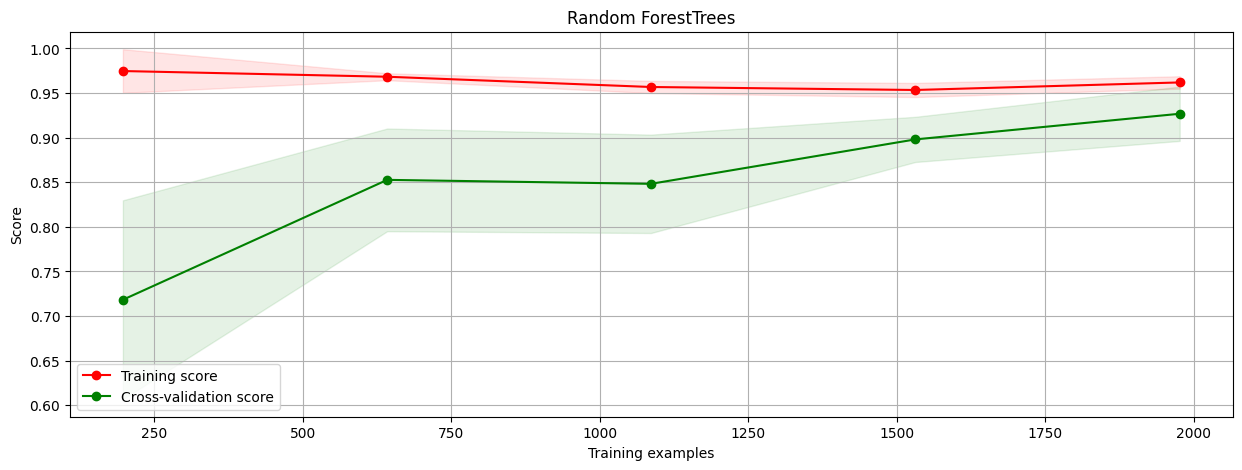

Train data accuracy: 0.9591093117408906
Test data accuracy: 0.8878923766816144
Accuracy of the model: 0.8878923766816144
ROC-AUC score test dataset:  0.9494748858447487

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       300
         1.0       0.80      0.88      0.84       146

    accuracy                           0.89       446
   macro avg       0.87      0.89      0.88       446
weighted avg       0.89      0.89      0.89       446




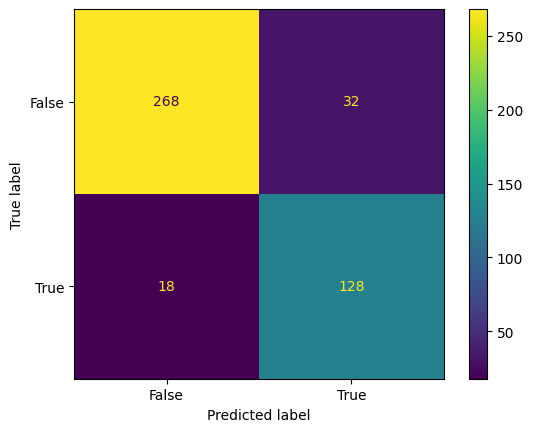

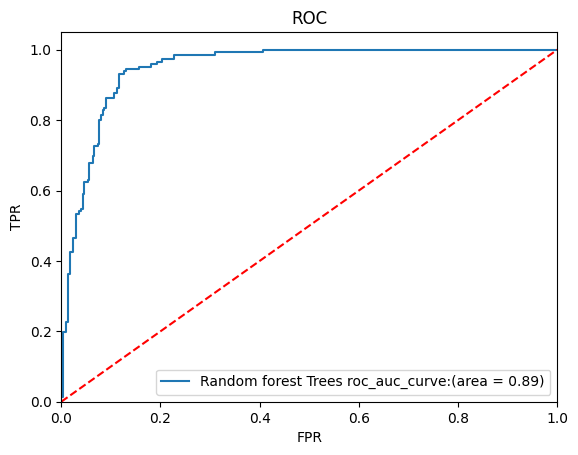

In [ ]:
#RandomForestClassifier-ensemble learning
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train_res,y_train_res)

#ploting learning curve
plot_learning_curve(rf_clf1, X_train_res,y_train_res, "Random ForestTrees")

#prediction based on Random ForestTrees
y_pred = rf_clf1.predict(X_test)
rf_clf_imp1 = rf_clf1.feature_importances_

#calculating accuracy and ROC_AUC score
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train_res,y_train_res))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print()

#claculte classification report
print(classification_report(y_test, y_pred))
print()

#confusion metrix
cm1 = (confusion_matrix(y_test, y_pred))
cm_display  = ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels=[False,True])
cm_display.plot()
plt.show()

#Random forest Trees roc_auc_curve
Ran_forR_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test, rf_clf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random forest Trees roc_auc_curve:(area = %0.2f)' %Ran_forR_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()


Insight:

For Random forest Trees ensemble the scores and plotting graphs shows-

1. learning curve shows that there would hardly benefit from adding more training data.
2. A classification report is used to measure the quality of predictions from a classification algorithm. Text summary of the precision, recall, F1 score for each class.
Precision is the ability of a classifier not to label an instance positive that is actually negative.  Precision = TP/(TP + FP)
Here precision value is (268/(268+18))*100=0.94% for class 0(not churn)

(128/(128+32))*100=0.80% for class 1(Churn)

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Recall: Fraction of positives that were correctly identified. Recall = TP/(TP+FN)
(268/(268+32))*100=0.89% for class 0(not churn)

(128/(128+18))*100=0.88% for class 1(Churn)

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. F1 Score = 2*(Recall * Precision) / (Recall + Precision)
2*(.94*.89)/(0.94+0.89)*100=0.91% for class 0(not churn)

2*(0.80*0.88)/(0.80+0.88)*100=0.84% for class 1(Churn)


If Recall value is low (i.e. FN are high), it means falsly prdicting not churned where as the driver churned means Company is loosing in opportunity cost.

If Precision value is low (i.e. FP are high), it means company's (churned drivers) may increase.

3. same can seen by confusion metrix.
4. ROc_auc area is 88%


**Gradient Boosting Classifier**

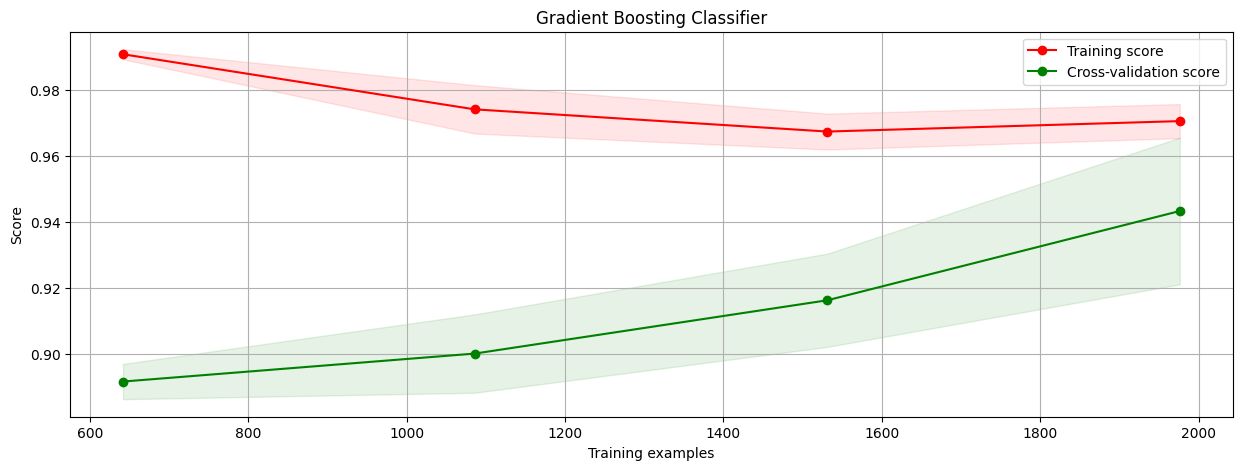


Train data accuracy: 0.968421052631579
Test data accuracy: 0.9125560538116592
Accuracy of the model: 0.9125560538116592
ROC-AUC score test dataset:  0.961472602739726

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       300
         1.0       0.84      0.91      0.87       146

    accuracy                           0.91       446
   macro avg       0.90      0.91      0.90       446
weighted avg       0.92      0.91      0.91       446




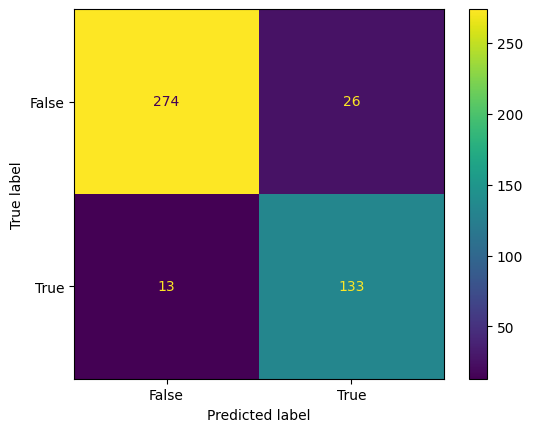

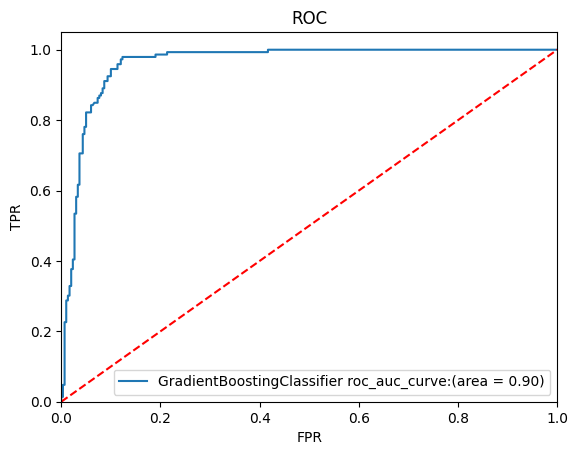

In [ ]:
#GradientBoostingClassifier-ensemble learning boosting algorithm
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train_res,y_train_res)

#ploting learning curve
plot_learning_curve(gbc1, X_train_res, y_train_res, "Gradient Boosting Classifier")

#prediction based on Gradient Boosting Classifier
y_pred1 = gbc1.predict(X_test)
gbc_clf_imp1 = gbc1.feature_importances_
print()

#calculating accuracy and ROC_AUC score
proba = gbc1.predict_proba(X_test)[:,1]
print("Train data accuracy:",gbc1.score(X_train_res, y_train_res))
print("Test data accuracy:",gbc1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred1))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print()

#claculte classification report
print(classification_report(y_test, y_pred1))
print()

#confusion metrix
cm1 = (confusion_matrix(y_test, y_pred1))
cm_display  = ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels=[False,True])
cm_display.plot()
plt.show()

#GradientBoostingClassifier roc_auc_curve
gbc_auc=roc_auc_score(y_test,y_pred1)
fpr,tpr,thresholds=roc_curve(y_test, gbc1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='GradientBoostingClassifier roc_auc_curve:(area = %0.2f)' %Ran_forR_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()



Insight:

for Gradient Boosting  Classifier
1. Train data accuracy: 0.968421052631579, Test data accuracy: 0.9125560538116592, Accuracy of the model: 0.9125560538116592, ROC-AUC score test dataset:  0.9613584474885845
2. precision(0.95), recall(0.91), f1-score(0.93) for non churned drivers  
precision(0.84), recall(0.91), f1-score(0.87) for churned drivers support
3. Among all 446 data , 274(TN), 26(FP), 133(TP), 13(FN)
4. Gradient Boosting  Classifier roc_auc_curve area 0.88.


**Comparision of feature importance of Random Forest Classifier and Gradient boosting classifier.**
Feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model.

In [ ]:
df2= pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'Gradient boosting Classifier':gbc_clf_imp1})
print(df2)

             Column_Name  RandomForestClassifier  Gradient boosting Classifier
0             Reportings                0.155434                      0.414441
1              Driver_ID                0.016450                      0.004713
2                    Age                0.014050                      0.002845
3                 Gender                0.012202                      0.005429
4                   City                0.010919                      0.004600
5        Education_Level                0.010237                      0.003200
6                 Income                0.091977                      0.011462
7    Joining Designation                0.025415                      0.006342
8                  Grade                0.060003                      0.011308
9   Total Business Value                0.099615                      0.164355
10      Quarterly Rating                0.039507                      0.018805
11                 month                0.079883    

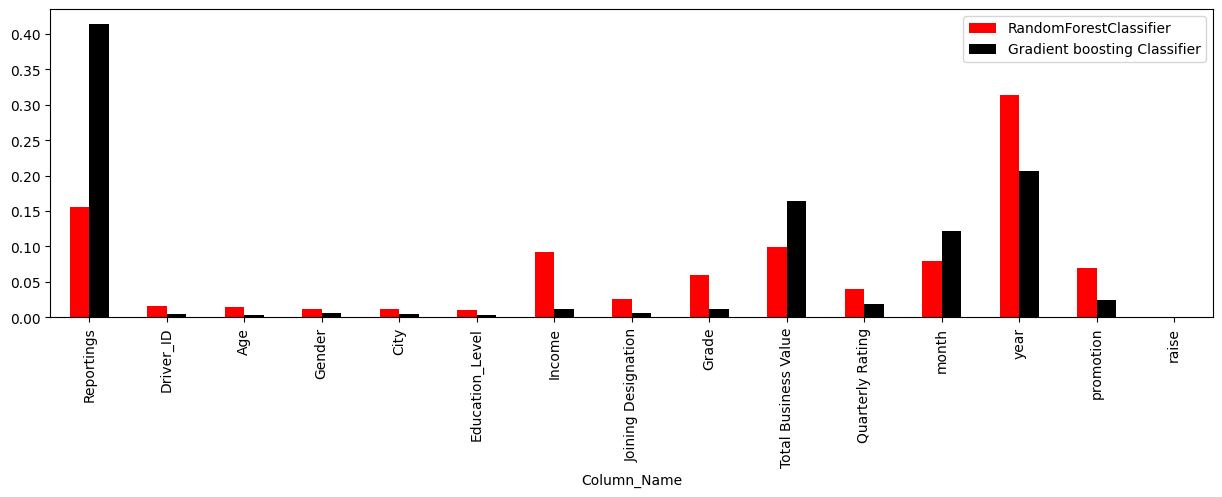

In [ ]:
df2.plot( x='Column_Name', kind="bar",color=['red','black'], figsize = (15,4))

plt.show()

Insight:

The feature importance given by Random Forest Classifier and Gradient boosting  Classifier are different for some fetures
The graph shows that Random forest Reportings, Income, grade, month, year and promotion are the important features to predict wether driver will churn or not.
And for gradient boosting classifier reportings, total business value, month, year are more important features.


Insights and Recommendation:

1. There are 19104 rows and 14 columns, but single driver id has multiple rows so need to group them and There are no need of Unnnamed column as Driver_ID uniquely identify the records.
2. There are 61, 52 null values for Age and Gender and a high range(17488) null values for  (LastWorkingDate) becuase driver didnt left the company only (19104-17488)= 1616 rows indicates their driver left the company.
3. Since target variable is absent, Target variable created with value 1 for churn and 0 for non churn employee.Target variable is already created from LastWorkingDate and year and month features are derived from Dateofjoining, so there is no need of these two features .
4. There are more male drivers(almost 1400) and less female drivers(almost 900).
  Education level doesnt effect very much.
  Joining designation has 1 for the most of the drivers and gradually decrease and 5 is the least.
  The most drivers are of grade 2 and least is 5.
  Quartely rating is 1 for the most of the drivers.
  In July most ride is done and in march the least ride is noted.
  In 2020 most ride was done.
  Target variable is imbalanced with non churned has more datapoints than churned.
  Raise and promotion increses if driver not churned and decreses when driver churned.
  maximum reportings is 5 then 3, 4 and 24 respectively.
  City 20 has the max number of rides.
5. The driver of age group 31-41 is more in OLA.
  Income and Total business value are right skwed shows outliers.
6.  Both gender almost equally churn.
  Education level 1 churn the most.
  Joining designation 3 churn the most.
  Driver with grade 3-5 churn more.
  Driver with Quarterly rating 4 churn more.
  Drivers churn more on September, November, December.
  In year 2014 drivers churn more and then downwards trend shows but since 2019 churning trend upward.
  Drivers who got mnore promotion and raise churn more.
  Drivres with reportings 24 almost all churn .
  55 years old churn the most.
7. 1. Reportings is strongly positively correlated with Income and Total Business Value and negatively correlated with year.
  Age is positively related with reportings and Income, grade, total business value and quarterly rating.
  Income is highly positively related with reportings and total business value and positively related with grade and quarterly rating.
  joining designation is highly positively correlated with the grade.
  Grade is positively correlated with joining designation, age, reportings, total business value and income.
  Total business value positively strongly correlated with reportings, income, qurterly ratings, target, promotion,raise, grade and age.
  quarterly rating is positevely correlated with reportings, total businesss value, promotion, income and age.
  Target is positively correlated with age, income, total business value
  Promotion, raise are positively corelated with reportings, age, income, total business vale quarterly ratig and target.
8. Boxplot shows a large number of outlier in Income, Total Business Value and subsequently less numbers of outliers in age, reportings, and insignificant numbers in year, raise, quarterly ratings and joining designation.
9. KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values
10. As per the result of cross validitation score of data
RandomForestClassifier(): Mean: 0.9241759459867991
GradientBoostingClassifier: Mean: 0.9008101980148133
XGBoostClassifier: Mean: 0.9201420869652844 shows high performance with RandomForestClassifier the most suited one and Logistc Regression Mean: 0.7492165062729883 the least suited.
11. Applying SMOTE for imbalance data counts of label 1 and 0 both are 1235. Now we use these X_train_res,y_train_res for further ensemble
12. For Random forest Trees ensemble the scores and plotting graphs shows-

learning curve shows that there would hardly benefit from adding more training data.
A classification report is used to measure the quality of predictions from a classification algorithm. Text summary of the precision, recall, F1 score for each class. Precision is the ability of a classifier not to label an instance positive that is actually negative. Precision = TP/(TP + FP) Here precision value is (268/(268+18))*100=0.94% for class 0(not churn)
(128/(128+32))*100=0.80% for class 1(Churn)

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Recall: Fraction of positives that were correctly identified. Recall = TP/(TP+FN) (268/(268+32))*100=0.89% for class 0(not churn)
(128/(128+18))*100=0.88% for class 1(Churn)
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. F1 Score = 2(Recall * Precision) / (Recall + Precision) 2(.94.89)/(0.94+0.89)100=0.91% for class 0(not churn)
2(0.800.88)/(0.80+0.88)*100=0.84% for class 1(Churn)
If Recall value is low (i.e. FN are high), it means falsly prdicting not churned where as the driver churned means Company is loosing in opportunity cost.
If Precision value is low (i.e. FP are high), it means company's (churned drivers) may increase.
same can seen by confusion metrix.
ROc_auc area is 88%

13. for Gradient Boosting  Classifier
  Train data accuracy: 0.968421052631579, Test data accuracy: 0.9125560538116592, Accuracy of the model: 0.9125560538116592, ROC-AUC score test dataset:  0.9613584474885845
  precision(0.95), recall(0.91), f1-score(0.93) for non churned drivers  
precision(0.84), recall(0.91), f1-score(0.87) for churned drivers support
  Among all 446 data , 274(TN), 26(FP), 133(TP), 13(FN)
  Gradient Boosting  Classifier roc_auc_curve area 0.88.
14. The feature importance given by Random Forest Classifier and Gradient boosting  Classifier are different for some fetures
The graph shows that Random forest Reportings, Income, grade, month, year and promotion are the important features to predict wether driver will churn or not.
And for gradient boosting classifier reportings, total business value, month, year are more important features.
